In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [19]:
data= pd.read_csv(r"D:/explorra/datasets/car_data.csv")

In [20]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [21]:
data.shape

(1000, 5)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [23]:
data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


1. Gender needs to be categorised.

2. annual salary needs to be standardised.

3. user id is not necessary.

4. no null values.

In [24]:
data['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [25]:
gender={"Male":0,"Female":1}

In [26]:
data["Gender"]=data["Gender"].map(gender)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   User ID       1000 non-null   int64
 1   Gender        1000 non-null   int64
 2   Age           1000 non-null   int64
 3   AnnualSalary  1000 non-null   int64
 4   Purchased     1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [119]:
age_mean_male=np.mean(data[data['Gender']==0]['Age'].values)
age_mean_fmale=np.mean(data[data['Gender']==1]['Age'].values)

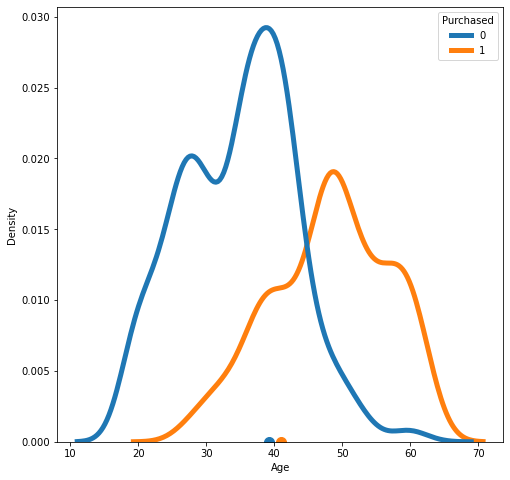

In [120]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(ax=ax, x=data['Age'],hue=data['Purchased'], linewidth=5)
ax.plot(age_mean_male,0,marker='o',markersize=10)
ax.plot(age_mean_fmale,0,marker='o',markersize=10)
# ax.plot(age_std,0,marker='o',markersize=115,markerfacecolor='green')

1. Age feature is normally distributed.
2. Age has no outliers present

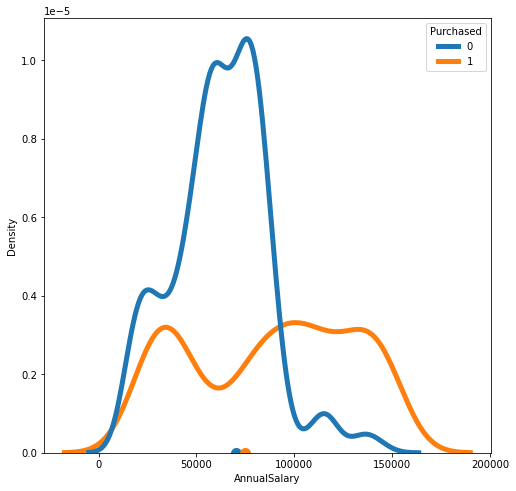

In [122]:
sal_mean_male=np.mean(data[data['Gender']==0]['AnnualSalary'].values)
sal_mean_fmale=np.mean(data[data['Gender']==1]['AnnualSalary'].values)
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(ax=ax, x=data['AnnualSalary'],hue=data['Purchased'], linewidth=5)
ax.plot(sal_mean_male,0,marker='o',markersize=10)
ax.plot(sal_mean_fmale,0,marker='o',markersize=10)

1. Annual salary is nearly normally distributed 
2. Annual salary has no outliers present

<AxesSubplot:xlabel='Gender', ylabel='count'>

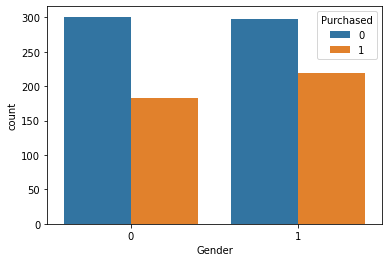

In [73]:
sns.countplot(data['Gender'],hue=data['Purchased'])

<AxesSubplot:xlabel='Purchased', ylabel='count'>

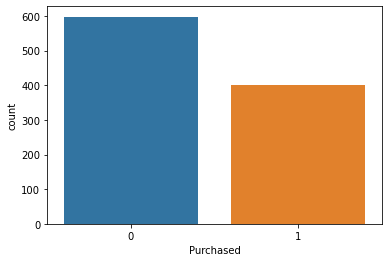

In [74]:
sns.countplot(data['Purchased'])

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scalar=StandardScaler()


In [76]:
from sklearn.model_selection import train_test_split

In [99]:
X_=data.drop('User ID',axis=1)
X=X_.iloc[:,:-1]
y=data.iloc[:,-1]

In [102]:
X=scalar.fit_transform(X)

In [103]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr=LogisticRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       189
           1       0.86      0.67      0.75       141

    accuracy                           0.81       330
   macro avg       0.82      0.79      0.80       330
weighted avg       0.82      0.81      0.81       330



In [111]:
confusion_matrix(y_test,y_pred)

array([[173,  16],
       [ 46,  95]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

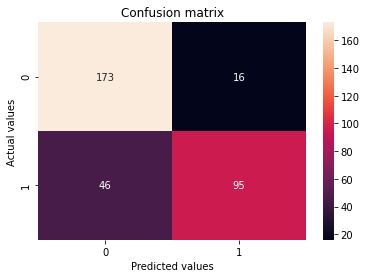

In [115]:

conf=confusion_matrix(y_test,y_pred)
conf=sns.heatmap(conf,annot=True,fmt='.4g')
conf.set_xlabel("Predicted values")
conf.set_ylabel("Actual values")
conf.set_title("Confusion matrix")

In [123]:
from imblearn.over_sampling import SMOTE

In [125]:
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X, y)

In [126]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.33, random_state=42)

In [127]:
lr1=LogisticRegression()

lr1.fit(X_train1,y_train1)

y_pred1=lr1.predict(X_test1)

In [128]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       204
           1       0.84      0.84      0.84       191

    accuracy                           0.85       395
   macro avg       0.85      0.85      0.85       395
weighted avg       0.85      0.85      0.85       395



Text(0.5, 1.0, 'Confusion matrix')

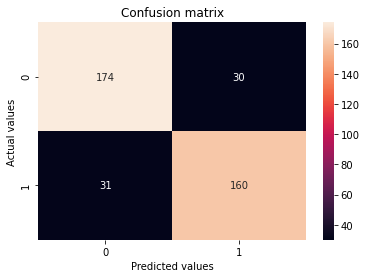

In [129]:

conf=confusion_matrix(y_test1,y_pred1)
conf=sns.heatmap(conf,annot=True,fmt='.4g')
conf.set_xlabel("Predicted values")
conf.set_ylabel("Actual values")
conf.set_title("Confusion matrix")